## Tarea 1: Niveles del lenguaje

### FECHA DE ENTREGA: 16 de Febrero 2025 at 11:59pm

### Fonética

1. Si tenemos un sistema de búsqueda que recibe una palabra ortográfica y devuelve sus transcripciones fonológicas, proponga una solución para los casos en que la palabra buscada no se encuentra en el lexicón/diccionario. *¿Cómo devolver o aproximar su transcripción fonológica?*
  - Reutiliza el sistema de búsqueda visto en clase y mejoralo con esta funcionalidad

In [3]:
import requests as r
from rich import print as rprint
from rich.panel import Panel
from rich.columns import Columns
from rich.text import Text
from typing import Dict, List
import http
from Levenshtein import distance as levenshtein_distance

In [4]:
url = "https://raw.githubusercontent.com/open-dict-data/ipa-dict/master/data/{lang}.txt"

In [5]:
lang_codes = {
    "ar": "Arabic",
    "de": "German",
    "en_US": "English (US)",
    "es_ES": "Spanish (Spain)",
    "es_MX": "Spanish (Mexico)",
    "fr_FR": "French (France)",
    "ja": "Japanese",
    "zh_hans": "Mandarin (Simplified)",
}

In [7]:
def download_ipa_dict(lang: str) -> str:
    rprint(f"🌐 Descargando {lang}...")
    resp = r.get(url.format(lang=lang))
    if resp.status_code != http.HTTPStatus.OK:
        rprint(f"Error al descargar {lang}")
        return ""
    return resp.text

def parse_ipa_dict(raw_data: str) -> Dict[str, str]:
    lines = raw_data.strip().split("\n")
    ipa_dict = {}
    for line in lines:
        if line:
            parts = line.split("\t")
            ipa_dict[parts[0]] = parts[1]
    return ipa_dict

def load_all_dicts() -> Dict[str, Dict[str, str]]:
    return {code: parse_ipa_dict(download_ipa_dict(code)) for code in lang_codes}

In [8]:
data = load_all_dicts()

🌐 Descargando ar...

🌐 Descargando de...

🌐 Descargando en_US...

🌐 Descargando es_ES...

🌐 Descargando es_MX...

🌐 Descargando fr_FR...

🌐 Descargando ja...

🌐 Descargando zh_hans...

In [9]:
def sugerir_similares(word: str, dicc: Dict[str, str], n: int = 3) -> List[str]:
    return sorted(dicc.keys(), key=lambda x: levenshtein_distance(word, x))[:n]

# Función para procesar consultas
def procesar_consulta(palabra: str, idioma: str, dicc: Dict[str, str]):
    palabra = palabra.lower()

    if palabra in dicc:
        rprint(f"{palabra}: {dicc[palabra]}")
    else:
        rprint(f"'{palabra}' no está en el diccionario.")
        sugeridas = sugerir_similares(palabra, dicc)
        if sugeridas:
            rprint("Palabras similares:")
            for sug in sugeridas:
                rprint(f"  🔹 [cyan]{sug}[/cyan] | {dicc[sug]}")
        else:
            rprint("No hay sugerencias disponibles.")

def formatear_idioma(code: str, nombre: str) -> str:
    return f"{nombre}{code}"

In [10]:
rprint(Panel(Text("Transcripción fonética de palabras", justify="center", style="bold")))
rprint(Columns([Panel(formatear_idioma(c, n), expand=True) for c, n in lang_codes.items()]))

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                       Transcripción fonética de palabras                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────╮ ╭──────────────────────╮ ╭───────────────────╮ ╭──────────────────────────────╮
│ Arabicar              │ │ Germande             │ │ English (US)en_US │ │ Spanish (Spain)es_ES         │
╰───────────────────────╯ ╰──────────────────────╯ ╰───────────────────╯ ╰──────────────────────────────╯
╭───────────────────────╮ ╭──────────────────────╮ ╭───────────────────╮ ╭──────────────────────────────╮
│ Spanish (Mexico)es_MX │ │ French (France)fr_FR │ │ Japaneseja        │ │ Mandarin (Simplified)zh_hans │
╰───────────────────────╯ ╰──────────────────────╯ ╰───────────────────╯ ╰──────────────────────────────╯

In [15]:
while True:
    lang_code = input("🌐 Selecciona un idioma (código): ").strip()

    if not lang_code:
        rprint("[bold yellow]👋🏼 Adiós![/bold yellow]")
        break

    if lang_code not in lang_codes:
        rprint(f"[bold red]❌ '{lang_code}' no es un código válido.[/bold red]")
        continue

    rprint(f"[bold green]✅ Idioma seleccionado:[/bold green] {lang_codes[lang_code]}")

    idioma_dict = data.get(lang_code, {})  # Asegúrate de que es ipa_data

    if not idioma_dict:
        rprint("[bold red]⚠️ No se encontraron datos para este idioma.[/bold red]")
        continue  # Vuelve a pedir el idioma

    while True:
        palabra = input(f"🔤 [{lang_code}] Palabra >> ").strip()
        if not palabra:
            break
        procesar_consulta(palabra, lang_code, idioma_dict)

🌐 Selecciona un idioma (código): es_MX


✅ Idioma seleccionado: Spanish (Mexico)

🔤 [es_MX] Palabra >> hola


hola: /ola/

🔤 [es_MX] Palabra >> motor


motor: /motoɾ/

🔤 [es_MX] Palabra >> coche


coche: /kotʃe/

🔤 [es_MX] Palabra >> estadio


estadio: /estaðjo/

🔤 [es_MX] Palabra >> futbol


'futbol' no está en el diccionario.

Palabras similares:

🔹 fútbol | /ˈfutβol/

🔹 árbol | /ˈaɾβol/

🔹 auto | /auto/

🔤 [es_MX] Palabra >> 
🌐 Selecciona un idioma (código): 


👋🏼 Adiós!

### Morfología

2. Obtenga los datos de `test` y `dev` para todas las lenguas disponibles en el Shared Task SIGMORPHON 2022 y haga lo siguiente:
    - En un plot de 4 columnas y 2 rows muestre las siguientes distribuciones (un subplot por lengua):
        - Plot 1: distribución de longitud de palabras
        - Plot 2: distribución de la cuenta de morfemas
        - Plot 3: distribución de categorias (si existe para la lengua)
    - Realice una función que imprima por cada lengua lo siguiente:
        - Total de palabras
        - La longitud de palabra promedio
        - La cuenta de morfemas promedio
        - La categoría más común
    - Con base en esta información elabore una conclusión lingüística sobre la morfología de las lenguas analizadas.

In [16]:
import requests as r
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict

In [17]:
# Con estas funciones descargo los datos

def get_file_urls(lang: str, track: str = "word") -> List[str]:
    return [
        f"{lang}.{track}.test.gold",
        f"{lang}.{track}.dev"
    ]

def fetch_corpus_data(files: List[str]) -> List[str]:
    combined = []
    for f in files:
        url = f"https://raw.githubusercontent.com/sigmorphon/2022SegmentationST/main/data/{f}.tsv"
        print(f"Descargando {f}.tsv", end=" ")
        resp = r.get(url)
        print(f"status={resp.status_code}")
        combined.extend(resp.text.strip().split("\n"))
    return combined

def corpus_to_dataframe(lines: List[str], lang: str) -> pd.DataFrame:
    rows = []
    for l in lines:
        parts = l.split("\t")
        if len(parts) == 3:
            word, morph, cat = parts
        else:
            word, morph = parts
            cat = "SIN_CATEGORIA"
        rows.append({
            "word": word,
            "morphemes": morph.split(),
            "category": cat,
            "lang": lang
        })
    df = pd.DataFrame(rows)
    df["word_length"] = df["word"].apply(len)
    df["morpheme_count"] = df["morphemes"].apply(len)
    return df

In [18]:
LANGUAGES = {
    "ces": "Checo",
    "eng": "Inglés",
    "fra": "Francés",
    "hun": "Húngaro",
    "spa": "Español",
    "ita": "Italiano",
    "lat": "Latín",
    "rus": "Ruso"
}

def load_all_data(langs: Dict[str, str]) -> Dict[str, pd.DataFrame]:
    dataframes = {}
    for lang in langs:
        files = get_file_urls(lang)
        lines = fetch_corpus_data(files)
        df = corpus_to_dataframe(lines, lang)
        dataframes[lang] = df
    return dataframes

data_by_lang = load_all_data(LANGUAGES)

Descargando ces.word.test.gold.tsv status=200
Descargando ces.word.dev.tsv status=200
Descargando eng.word.test.gold.tsv status=200
Descargando eng.word.dev.tsv status=200
Descargando fra.word.test.gold.tsv status=200
Descargando fra.word.dev.tsv status=200
Descargando hun.word.test.gold.tsv status=200
Descargando hun.word.dev.tsv status=200
Descargando spa.word.test.gold.tsv status=200
Descargando spa.word.dev.tsv status=200
Descargando ita.word.test.gold.tsv status=200
Descargando ita.word.dev.tsv status=200
Descargando lat.word.test.gold.tsv status=200
Descargando lat.word.dev.tsv status=200
Descargando rus.word.test.gold.tsv status=200
Descargando rus.word.dev.tsv status=200


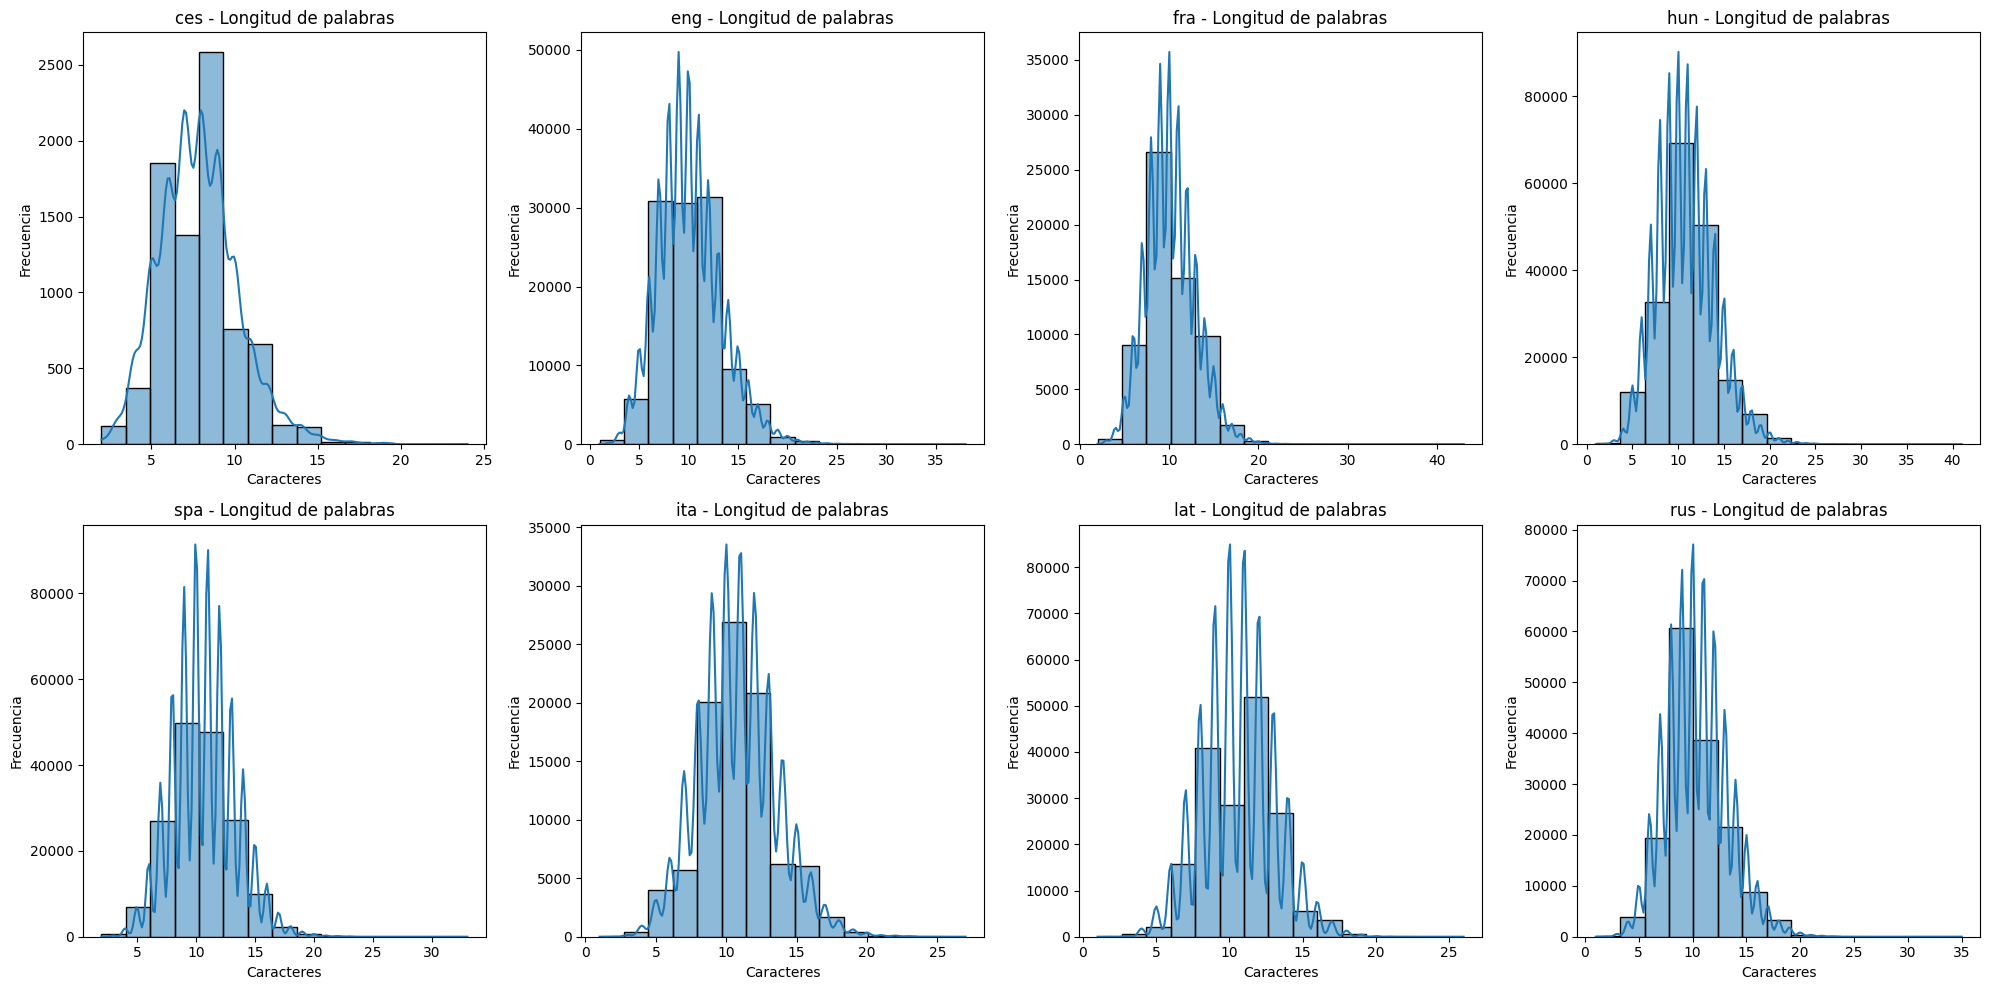

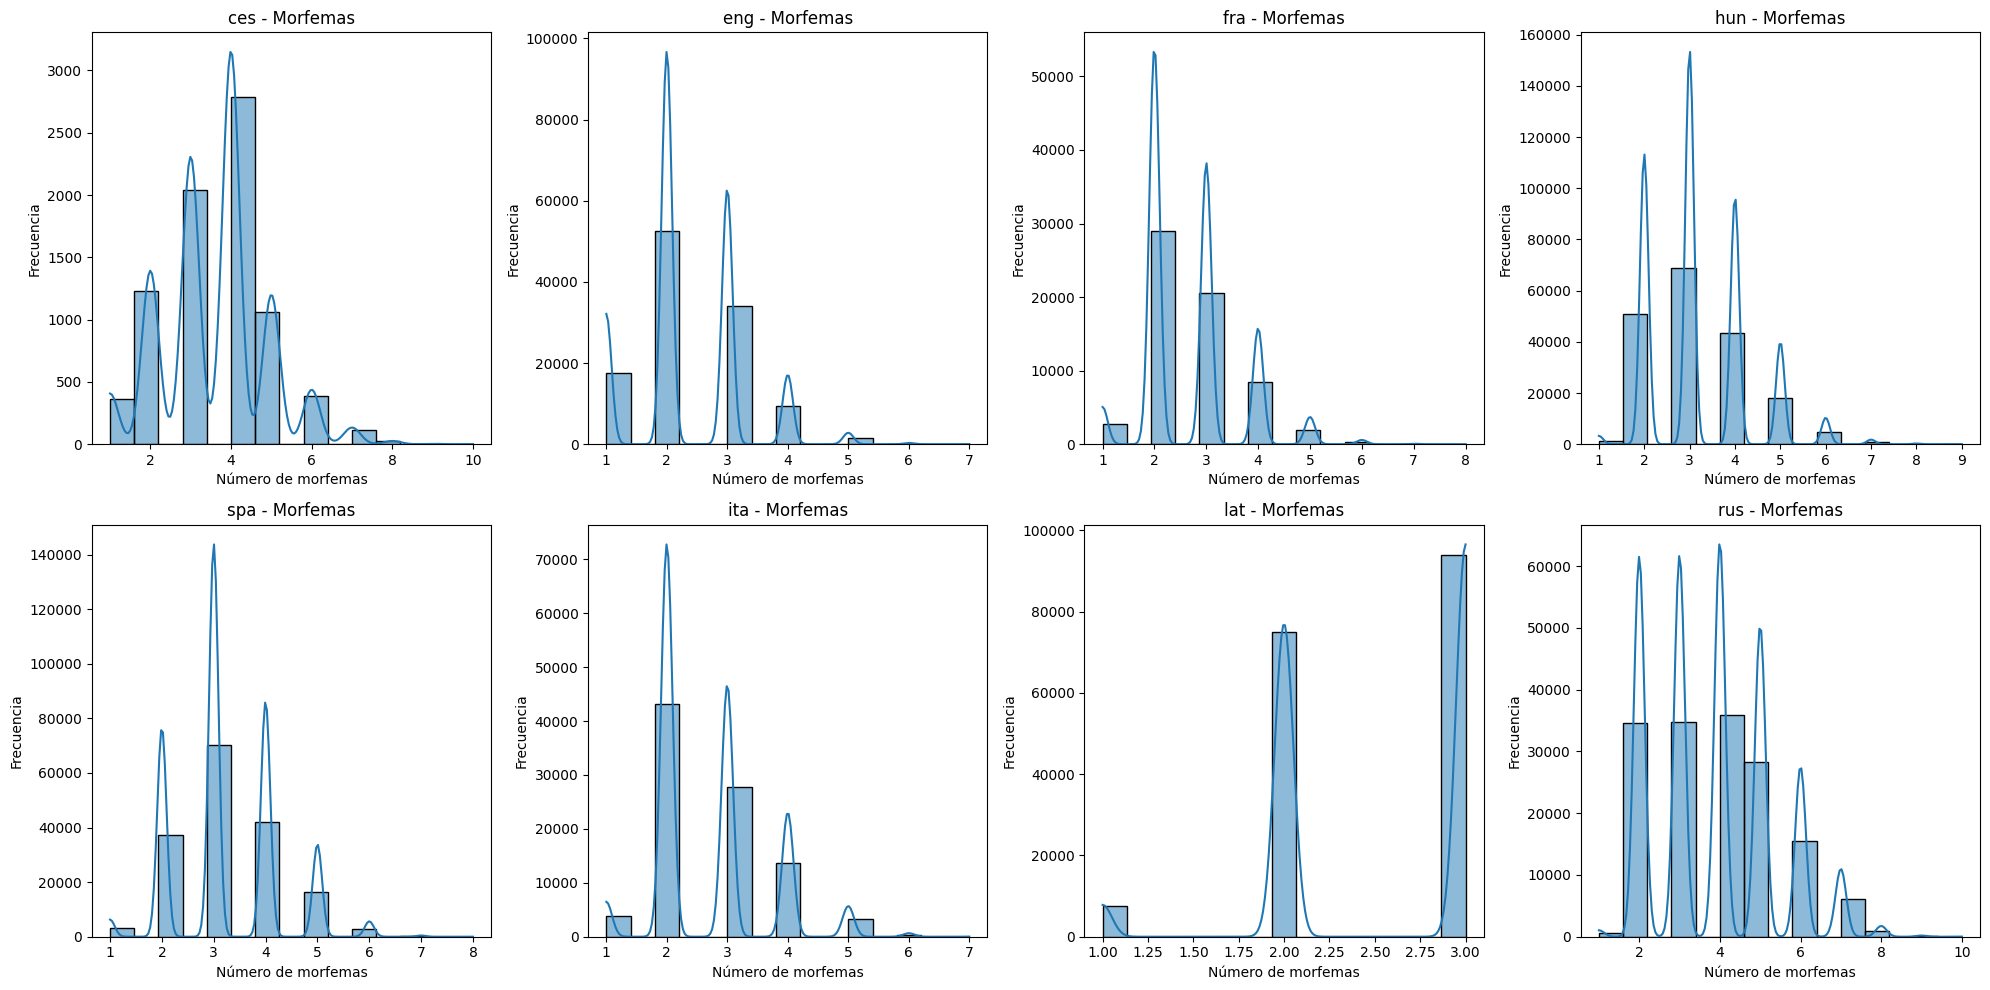

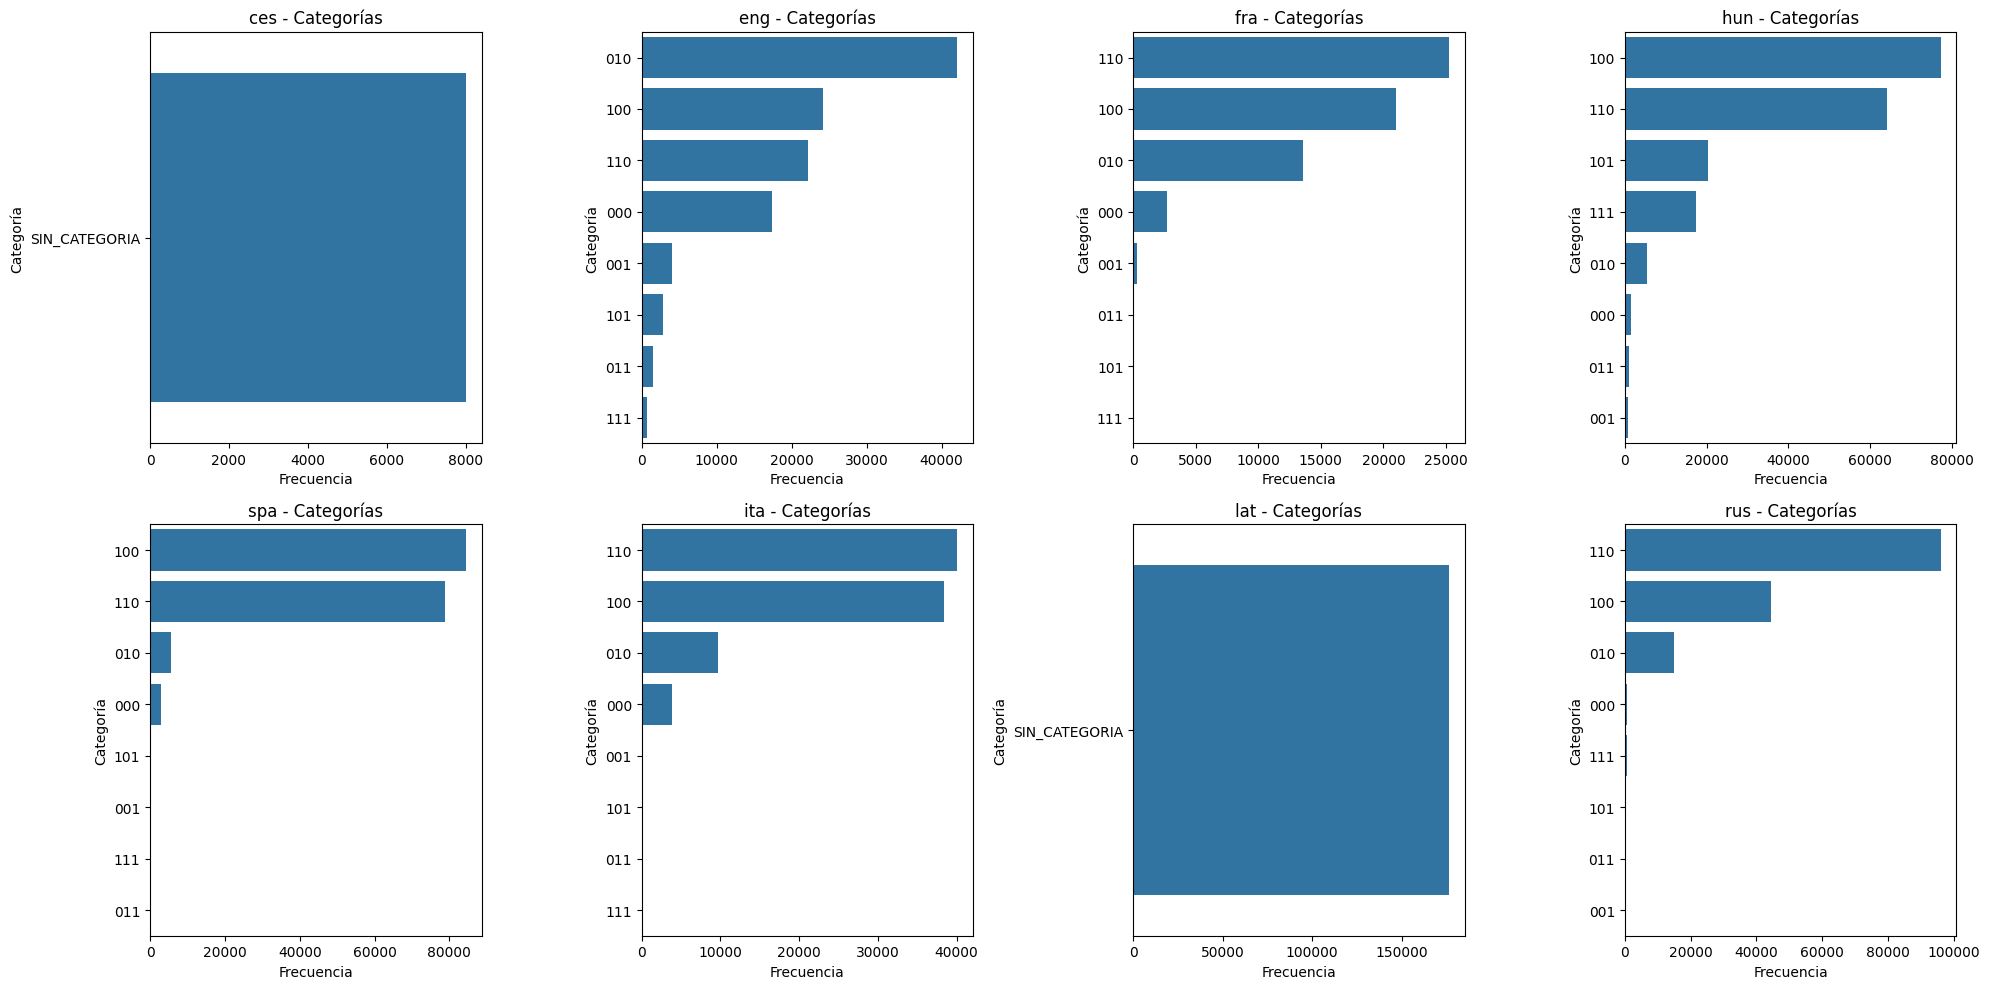

In [19]:
def plot_word_lengths(data_dict: Dict[str, pd.DataFrame]):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, (lang, df) in enumerate(data_dict.items()):
        sns.histplot(df["word_length"], bins=15, ax=axes[i], kde=True)
        axes[i].set_title(f"{lang} - Longitud de palabras")
        axes[i].set_xlabel("Caracteres")
        axes[i].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

# Número de morfemas
def plot_morpheme_counts(data_dict: Dict[str, pd.DataFrame]):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, (lang, df) in enumerate(data_dict.items()):
        sns.histplot(df["morpheme_count"], bins=15, ax=axes[i], kde=True)
        axes[i].set_title(f"{lang} - Morfemas")
        axes[i].set_xlabel("Número de morfemas")
        axes[i].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()

# Categorías gramaticales
def plot_categories(data_dict: Dict[str, pd.DataFrame]):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, (lang, df) in enumerate(data_dict.items()):
        sns.countplot(y=df["category"], order=df["category"].value_counts().index, ax=axes[i])
        axes[i].set_title(f"{lang} - Categorías")
        axes[i].set_xlabel("Frecuencia")
        axes[i].set_ylabel("Categoría")

    plt.tight_layout()
    plt.show()

plot_word_lengths(data_by_lang)
plot_morpheme_counts(data_by_lang)
plot_categories(data_by_lang)

In [20]:
def show_morphology_stats(data_dict: Dict[str, pd.DataFrame]):
    for lang, df in data_dict.items():
        total = len(df)
        avg_len = df["word_length"].mean()
        avg_morphs = df["morpheme_count"].mean()
        common_cat = df["category"].mode()[0]

        print(f"\n=== {lang} ===")
        print(f"Cantidad total de palabras: {total}")
        print(f"Promedio de longitud: {avg_len:.2f}")
        print(f"Promedio de morfemas: {avg_morphs:.2f}")
        print(f"Categoría más frecuente: {common_cat}")

show_morphology_stats(data_by_lang)


=== ces ===
Cantidad total de palabras: 8000
Promedio de longitud: 7.84
Promedio de morfemas: 3.59
Categoría más frecuente: SIN_CATEGORIA

=== eng ===
Cantidad total de palabras: 115126
Promedio de longitud: 10.11
Promedio de morfemas: 2.35
Categoría más frecuente: 010

=== fra ===
Cantidad total de palabras: 63173
Promedio de longitud: 10.20
Promedio de morfemas: 2.67
Categoría más frecuente: 110

=== hun ===
Cantidad total de palabras: 188074
Promedio de longitud: 10.86
Promedio de morfemas: 3.23
Categoría más frecuente: 100

=== spa ===
Cantidad total de palabras: 172173
Promedio de longitud: 10.69
Promedio de morfemas: 3.24
Categoría más frecuente: 100

=== ita ===
Cantidad total de palabras: 92304
Promedio de longitud: 10.80
Promedio de morfemas: 2.68
Categoría más frecuente: 110

=== lat ===
Cantidad total de palabras: 176467
Promedio de longitud: 10.55
Promedio de morfemas: 2.49
Categoría más frecuente: SIN_CATEGORIA

=== rus ===
Cantidad total de palabras: 156846
Promedio de l

En el análisis, la mayoría tienen un promedio de longitud de alrededor de 10 caracteres, con el checo mostrando palabras más cortas. Las lenguas como el ruso y el húngaro presentan una estructura morfológica más compleja, evidenciada por un mayor número de morfemas por palabra, a diferencia del inglés, que muestra una menor complejidad morfológica, lo que sugiere que recurre más a la sintaxis para expresar relaciones gramaticales. El español, italiano y francés tienen cierta flexibilidad pero menos lenguas con muchos morfemas.

### EXTRA:

- Imprimir la [matríz de confusión](https://en.wikipedia.org/wiki/Confusion_matrix) para el etiquetador CRFs visto en clase y elaborar una conclusión sobre los resultados

In [23]:
import nltk
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_crfsuite import CRF
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [24]:
nltk.download('cess_esp')
from nltk.corpus import cess_esp

oraciones = cess_esp.tagged_sents()

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


In [25]:
def obtener_map_tags() -> dict:
    lines = requests.get(
        "https://gist.githubusercontent.com/vitojph/39c52c709a9aff2d1d24588aba7f8155/raw/af2d83bc4c2a7e2e6dbb01bd0a10a23a3a21a551/universal_tagset-ES.map"
    ).text.split("\n")
    return {line.split("\t")[0].lower(): line.split("\t")[1] for line in lines}

tags_map = obtener_map_tags()

In [30]:
def mapear_tags(oraciones: list) -> list:
    result = []
    for oracion in oraciones:
        mapeada = [
            (palabra, tags_map.get(tag.lower(), "N/A"))
            for palabra, tag in oracion
            if tag not in ["Fp", "Fc", "Fpa", "Fpt"]
        ]
        result.append(mapeada)
    return result

oraciones_lista = [oracion for oracion in cess_esp.tagged_sents()]
oraciones_mapeadas = mapear_tags(oraciones_lista)

In [31]:
def extraer_features(oracion, idx):
    palabra = oracion[idx][0]
    feats = {
        "palabra.lower()": palabra.lower(),
        "sufijo_3": palabra[-3:],
        "sufijo_2": palabra[-2:],
        "es_mayuscula": palabra.isupper(),
        "es_titulo": palabra.istitle(),
        "es_numero": palabra.isdigit(),
        "longitud": len(palabra)
    }
    if idx > 0:
        palabra_anterior = oracion[idx-1][0]
        feats.update({
            "prev.lower()": palabra_anterior.lower(),
            "prev.titulo": palabra_anterior.istitle()
        })
    else:
        feats["INICIO"] = True
    return feats

def oracion_a_features(oracion):
    return [extraer_features(oracion, i) for i in range(len(oracion))]

def oracion_a_etiquetas(oracion):
    return [etiqueta for _, etiqueta in oracion]

In [32]:
X = [oracion_a_features(oracion) for oracion in oraciones_mapeadas]
y = [oracion_a_etiquetas(oracion) for oracion in oraciones_mapeadas]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Entrenamiento del modelo CRF
crf = CRF(algorithm="lbfgs", c1=0.1, c2=0.1, max_iterations=100, all_possible_transitions=True)
crf.fit(X_train, y_train)

CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    max_iterations=100)

===== REPORTE DE CLASIFICACIÓN =====
              precision    recall  f1-score   support

           .       1.00      1.00      1.00      1047
         ADJ       0.90      0.90      0.90      2728
         ADP       1.00      1.00      1.00      6513
         ADV       0.96      0.93      0.95      1429
        CONJ       0.96      0.97      0.97      2120
         DET       0.99      0.99      0.99      5549
        NOUN       0.96      0.97      0.97      9003
         NUM       0.95      0.86      0.90       397
        PRON       0.95      0.94      0.95      1753
        VERB       0.98      0.97      0.98      4475
           X       1.00      0.17      0.29        12

    accuracy                           0.97     35026
   macro avg       0.97      0.88      0.90     35026
weighted avg       0.97      0.97      0.97     35026



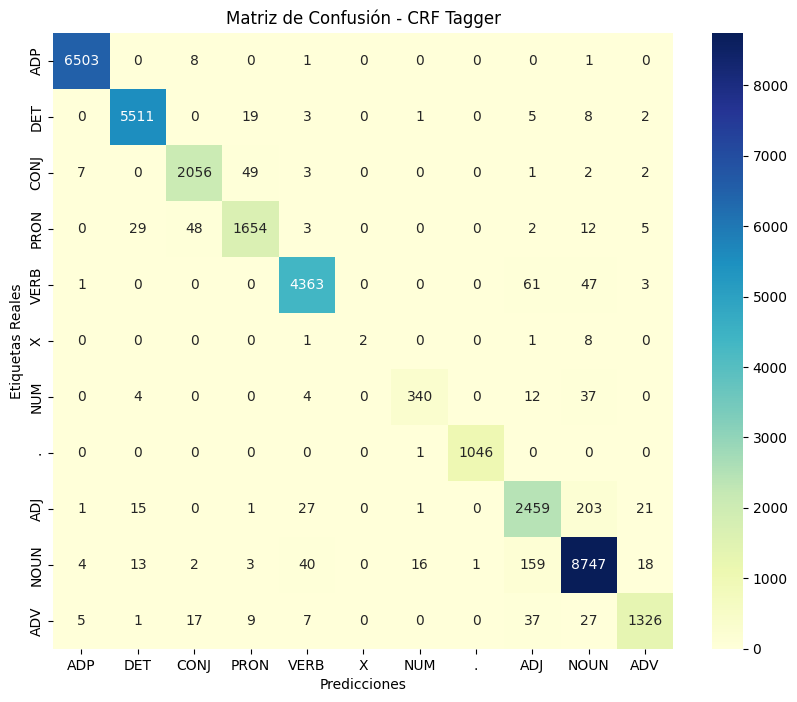

In [33]:
y_pred = crf.predict(X_test)

y_test_flat = [tag for sent in y_test for tag in sent]
y_pred_flat = [tag for sent in y_pred for tag in sent]

print("===== REPORTE DE CLASIFICACIÓN =====")
print(classification_report(y_test_flat, y_pred_flat))

# Matriz de confusión
etiquetas_unicas = list(set(y_test_flat))
matriz = confusion_matrix(y_test_flat, y_pred_flat, labels=etiquetas_unicas)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, fmt="d", cmap="YlGnBu", xticklabels=etiquetas_unicas, yticklabels=etiquetas_unicas)
plt.title("Matriz de Confusión - CRF Tagger")
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Reales")
plt.show()

El modelo CRF demuestra un buen desempeño, con una precisión elevada en casi todas las categorías gramaticales. Los errores más notorios ocurren en etiquetas que suelen compartir formas o funciones en español, como el caso de adjetivos y sustantivos o determinantes y pronombres. Existe una ambiguedad en algunas construcciones gramaticales para el etiquetado automático.